## LAB 2 - CRC
    - **Nome:** Wendell Tomé Marinho OLiveira
    - **Matrícula:** 122110748


## Parte 2: Implementação Manual do Algoritmo CRC


In [46]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1
    
    # 2. Crie M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)
    
    # 3. Implemente o loop de divisão.
    #    Percorra a mensagem bit a bit.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - a janela 
        if mensagem_aumentada[i] == '1':
            janela_atual = "".join(mensagem_aumentada[i : i + r + 1])
            resultado_xor = xor_bits(janela_atual, gerador_bits)
            
            # Atualize a mensagem com o resultado do XOR.
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j + 1] = resultado_xor[j]
    
    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie T(x)=  M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra os bit original da mensagem (em uma janela), da esquerda para a direita.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - considere a janela atual como os próximos r+1 bits. (para pode dividir o por G(x))
        inicio = i
        fim = i + len(gerador_bits)
        
        if mensagem_aumentada[i] == '1' and fim <= len(mensagem_aumentada):            
            
            janela_atual = "".join(mensagem_aumentada[inicio : fim]) # inicio e fim devem calculados
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            # - Substitua os bits correspondentes na mensagem pela saída do XOR,
#          ignorando o primeiro bit (que já foi processado).
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

### Comparação com RCNA_05

In [47]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
# Quadro T(x) a ser transmitido: dados_teste + crc_calculado

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010


### Resultado está condizente com o que apresentado no slide:

![slide_na05_48](images/slide_na05_48.png)


## Parte 3: Análise Comparativa de Desempenho

In [48]:
import time
import tracemalloc
import os
from crc import Calculator, Crc16

# --- Insira sua função calcular_crc_manual e xor_bits aqui ---

def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado

def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie T(x)=  M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra os bit original da mensagem (em uma janela), da esquerda para a direita.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - considere a janela atual como os próximos r+1 bits. (para pode dividir o por G(x))
        inicio = i
        fim = i + len(gerador_bits)
        
        if mensagem_aumentada[i] == '1' and fim <= len(mensagem_aumentada):            
            
            janela_atual = "".join(mensagem_aumentada[inicio : fim]) # inicio e fim devem calculados
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            # - Substitua os bits correspondentes na mensagem pela saída do XOR,
#          ignorando o primeiro bit (que já foi processado).
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

 # Usando um padrão de 16 bits como referência
calculator_lib = Calculator(Crc16.MODBUS)

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 3000 , 6000 , 16000]

resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    # Gere uma mensagem aleatória de bits
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)
    
    # Medição da nossa Implementação
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_manual = calcular_crc_manual(mensagem_bits, "11000000000000101") # G(x) do CRC-16/MODBUS
    
    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_manual = end_time - start_time
    
    # Medição da Biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_lib = calculator_lib.checksum(mensagem_bytes)
    
    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_lib = end_time - start_time
    
    # Armazene os resultados
    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024, # em KiB
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024 # em KiB
    })

print("--- Resultados Finais ---")
print(resultados)

Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 3000 bytes...
Analisando para mensagem de 6000 bytes...
Analisando para mensagem de 16000 bytes...
--- Resultados Finais ---
[{'tamanho': 1500, 'tempo_manual': 0.32347553099953075, 'mem_pico_manual': 105.7509765625, 'tempo_lib': 0.08645927399993525, 'mem_pico_lib': 1.21875}, {'tamanho': 3000, 'tempo_manual': 0.5987700380001115, 'mem_pico_manual': 211.2197265625, 'tempo_lib': 0.17715360399961355, 'mem_pico_lib': 1.21875}, {'tamanho': 6000, 'tempo_manual': 1.1867821759997241, 'mem_pico_manual': 422.1572265625, 'tempo_lib': 0.3614818590003779, 'mem_pico_lib': 1.21875}, {'tamanho': 16000, 'tempo_manual': 3.214453730999594, 'mem_pico_manual': 1125.2822265625, 'tempo_lib': 0.9784805530007361, 'mem_pico_lib': 1.21875}]


### Máquina:

#### Instalar Biblioteca Para ver Infos da Minha Máquina

In [49]:
!pip install py-cpuinfo

Defaulting to user installation because normal site-packages is not writeable


In [55]:
import platform
import cpuinfo
import psutil


# Informações básicas
print("===== INFORMAÇÕES DO SISTEMA =====")
print(f"Arquitetura: {platform.machine()}")
print(f"Processador: {cpuinfo.get_cpu_info()['brand_raw']}")
print(f"Núcleos (físicos): {psutil.cpu_count(logical=False)}")
print(f"Núcleos (lógicos): {psutil.cpu_count(logical=True)}")
print(f"Frequência da CPU: {psutil.cpu_freq().max:.2f} MHz")

# Memória RAM
mem = psutil.virtual_memory()
print(f"Memória Total: {mem.total / (1024**3):.2f} GB")

### Output 
# ===== INFORMAÇÕES DO SISTEMA =====
# Arquitetura: x86_64
# Processador: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz
# Núcleos (físicos): 4
# Núcleos (lógicos): 8
# Frequência da CPU: 4000.00 MHz
# Memória Total: 31.10 GB

===== INFORMAÇÕES DO SISTEMA =====
Arquitetura: x86_64
Processador: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz
Núcleos (físicos): 4
Núcleos (lógicos): 8
Frequência da CPU: 4000.00 MHz
Memória Total: 31.10 GB


### Plot Gráfico

#### Gráfico 1: Tamanho da Mensagem (x) x Tempo de Execução (y)

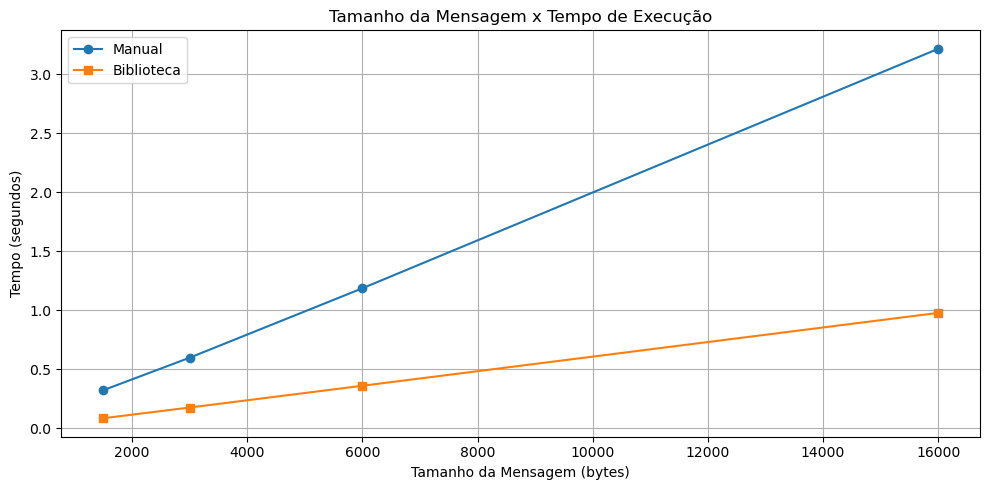

In [62]:
import matplotlib.pyplot as plt

# Extrair dados
tamanhos = [r['tamanho'] for r in resultados]

tempos_manual = [r['tempo_manual'] for r in resultados]
tempos_lib = [r['tempo_lib'] for r in resultados]

# Gráfico 1: Tempo de Execução
plt.figure(figsize=(10, 5))
plt.plot(tamanhos, tempos_manual, marker='o', label='Manual')
plt.plot(tamanhos, tempos_lib, marker='s', label='Biblioteca')
plt.title('Tamanho da Mensagem x Tempo de Execução')
plt.xlabel('Tamanho da Mensagem (bytes)')
plt.ylabel('Tempo (segundos)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### Gráfico 2: Tamanho da Mensagem (x) x Pico de Memória (y)

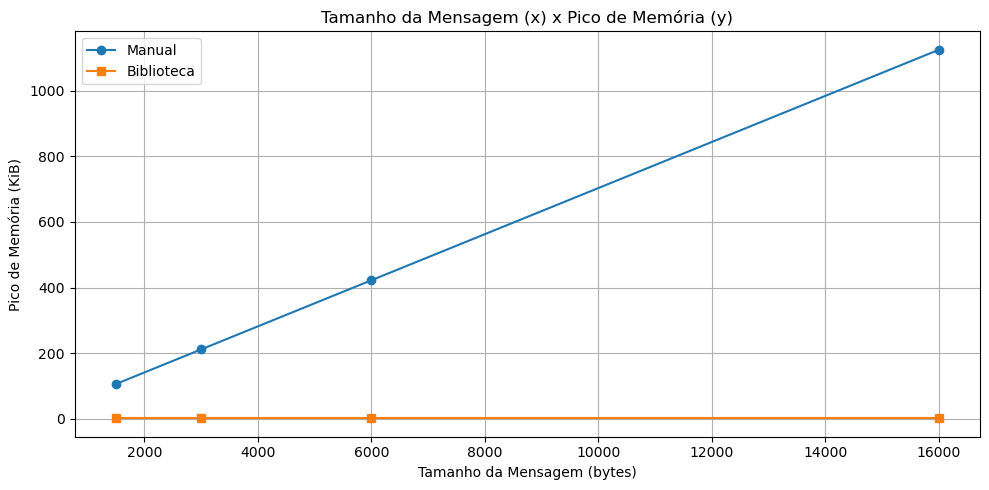

In [63]:
mem_manual = [r['mem_pico_manual'] for r in resultados]
mem_lib = [r['mem_pico_lib'] for r in resultados]

plt.figure(figsize=(10, 5))
plt.plot(tamanhos, mem_manual, marker='o', label='Manual')
plt.plot(tamanhos, mem_lib, marker='s', label='Biblioteca')
plt.title('Tamanho da Mensagem (x) x Pico de Memória (y)')
plt.xlabel('Tamanho da Mensagem (bytes)')
plt.ylabel('Pico de Memória (KiB)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Parte 4: Análise Investigativa da Detecção de Erros (Cenário Personalizado)

> ⚠️ **Prencha a planilha**

| VARIAVEL              | VALOR |
| :-                    | :-    |
| `MENSAGEM`            |   wendell tome marinho oliveira   |
| `MENSAGEM_BASE`       |   0111011101100101011011100110010001100101011011000110110000100000011101000110111101101101011001010010000001101101011000010111001001101001011011100110100001101111001000000110111101101100011010010111011001100101011010010111001001100001 |
| `CRC`                 |   10001000000100001   |

In [ ]:
# Nome: wendell tome marinho oliveira
## Em Binário: 
# 01110111 01100101 01101110 01100100 01100101 
# 01101100 01101100 00100000 01110100 01101111 
# 01101101 01100101 00100000 01101101 01100001 
# 01110010 01101001 01101110 01101000 01101111 
# 00100000 01101111 01101100 01101001 01110110 
# 01100101 01101001 01110010 01100001 

MENSAGEM_BASE = "0111011101100101011011100110010001100101011011000110110000100000011101000110111101101101011001010010000001101101011000010111001001101001011011100110100001101111001000000110111101101100011010010111011001100101011010010111001001100001"

# Matricula: 122110748
## Final 8, 9: CRC-16/CCITT-FALSE (10001000000100001 ou x^16 + x^12 + x^5 + 1) -> 10001000000100001
CRC = "10001000000100001"
